# 6.5 ESA Task 6.5 Extension - SRS Australia

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Verify Australia dataset import results; data wrangling

#### 03. Data preprocessing

#### 04. PCA (Principal Components Analysis)

#### 05. k-means clustering

#### 06. Visualizations

#### 07. Task 6.5 Extension: Australia SRS component data derivation

### 01. Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1" # This only applies to this notebook session, to try to mitigate annoying Windows-constraint related warnings
import sklearn
from sklearn.cluster import KMeans # Imports the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Imports z-score method scaling function to standardize (normalize) numerical data.
from sklearn.decomposition import PCA # Imports the PCA algorithm for PCA analysis.

In [3]:
# Import datasets

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

australia_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
exo_shk_flags = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'exo_shk_flags_copy.pkl'))
fx_vix_comm_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

### 02. Verify Australia dataset import results; data wrangling

#### This country-specific notebook extension to Task 6.5 is necessary to derive the raw data that will go into a bespoke country-level SRS ("Shock Resilience Score") calculation.

#### Note: this analysis segment will focus on Australia's original raw data variables rather than the transformed annual log return & first difference %'s versions, to ensure like-with-like comparison of the Australia country-level PCA + k-means clustering results with other country results.

#### Verify import results

In [9]:
australia_pre_stat.shape

(243, 29)

In [11]:
australia_pre_stat.head(15)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
0,Australia,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
1,Australia,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
2,Australia,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
3,Australia,2005-04-01,2005,4,2005-04,Apr,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
4,Australia,2005-05-01,2005,5,2005-05,May,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
5,Australia,2005-06-01,2005,6,2005-06,Jun,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
6,Australia,2005-07-01,2005,7,2005-07,Jul,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
7,Australia,2005-08-01,2005,8,2005-08,Aug,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
8,Australia,2005-09-01,2005,9,2005-09,Sep,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
9,Australia,2005-10-01,2005,10,2005-10,Oct,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN


In [13]:
australia_pre_stat.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
240,Australia,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,27670000.0,0.070769,0.0000,-0.0002,0.0033,0.103963,-0.026012,0.015873,0.007326,0.013204
241,Australia,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,27670000.0,0.038466,-0.0010,-0.0017,0.0028,0.096376,-0.026012,0.015873,0.082309,0.013204
242,Australia,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,27670000.0,0.045024,-0.0025,-0.0023,0.0038,0.024064,-0.026012,0.015873,0.048050,0.013204


In [15]:
australia_pre_stat.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'fx_to_usd_logret12', 'int_rate_ovn_diff',
       'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

#### Comment: Australia reports quarterly CPI data to the OECD, rather than monthly as other countries. This variable was therefore omitted from the Australian dataset due to its different temporal grain.

#### Data wrangling

#### Reshape and reset the index for the "australia_pre_stat" dataframe to match the temporal period range and indexing of the other dataframes, which run from Jan 2006 to Mar 2025, on a monthly temporal grain.

In [20]:
# Reset the index (the argument "drop=True" drops the original index)
australia_pre_stat.reset_index(drop=True, inplace=True)

In [22]:
# Delete first 12 rows and overwrite the dataframe
australia_pre_stat.drop(index=range(12), inplace=True)

In [24]:
australia_pre_stat.shape

(231, 29)

In [26]:
australia_pre_stat.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
12,Australia,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,...,20450966.0,0.015152,0.0025,0.0021,-0.0015,0.174791,0.046371,0.025668,0.017596,0.013586
13,Australia,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,...,20450966.0,0.053245,0.0025,-0.0002,-0.0013,0.160289,0.046371,0.025668,0.003929,0.013586
14,Australia,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,...,20450966.0,0.083067,0.0001,-0.0020,-0.0031,0.170582,0.046371,0.025668,-0.057843,0.013586


In [28]:
# Reset the index (the argument "drop=True" drops the original index)
australia_pre_stat.reset_index(drop=True, inplace=True)

In [30]:
australia_pre_stat.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
0,Australia,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,...,20450966.0,0.015152,0.0025,0.0021,-0.0015,0.174791,0.046371,0.025668,0.017596,0.013586
1,Australia,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,...,20450966.0,0.053245,0.0025,-0.0002,-0.0013,0.160289,0.046371,0.025668,0.003929,0.013586
2,Australia,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,...,20450966.0,0.083067,0.0001,-0.0020,-0.0031,0.170582,0.046371,0.025668,-0.057843,0.013586


In [32]:
australia_pre_stat.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
228,Australia,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,27670000.0,0.070769,0.0000,-0.0002,0.0033,0.103963,-0.026012,0.015873,0.007326,0.013204
229,Australia,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,27670000.0,0.038466,-0.0010,-0.0017,0.0028,0.096376,-0.026012,0.015873,0.082309,0.013204
230,Australia,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,27670000.0,0.045024,-0.0025,-0.0023,0.0038,0.024064,-0.026012,0.015873,0.048050,0.013204


#### Verify the "exo_shk_flags" dataframe content is as expected.

In [35]:
exo_shk_flags.shape

(231, 7)

In [37]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [39]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [41]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

#### Verify the "fx_vix_comm_pre_stat" dataframe content is as expected.

In [44]:
fx_vix_comm_pre_stat.shape

(243, 74)

In [46]:
fx_vix_comm_pre_stat.head(15)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,2005,4,2005-04,Apr,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,2005,5,2005-05,May,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,2005,6,2005-06,Jun,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,2005,7,2005-07,Jul,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,2005,8,2005-08,Aug,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,2005,9,2005-09,Sep,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,2005,10,2005-10,Oct,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [50]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Reshape the "fx_vix_comm_pre_stat" dataframe to have the same temporal range and index number sequence as the other dataframes, which means deleting the year 2005 monthly data rows (which have NaN values for all the annual log return variables based on the 12-period lag in the log return calculation).

In [53]:
# Delete first 12 rows and overwrite the dataframe
fx_vix_comm_pre_stat.drop(index=range(12), inplace=True)

In [55]:
fx_vix_comm_pre_stat.shape

(231, 74)

In [57]:
fx_vix_comm_pre_stat.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,False,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,False,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,False,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [59]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [61]:
# Reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_pre_stat.reset_index(drop=True, inplace=True)

In [63]:
fx_vix_comm_pre_stat.shape

(231, 74)

In [65]:
fx_vix_comm_pre_stat.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,False,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,False,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,False,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [67]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [69]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Create "df3" subset dataframe with eight (8) original raw data variables (pre-log return transformations) to examine

In [72]:
df3 = australia_pre_stat[['int_rate_10y', 'stock_index', 'unemp_rate']].copy()

##### This dataframe will start with eight (8) variables.

In [75]:
df3[['vix_avg', 'usd_aud', 'brent_avg', 'aud_jpy', 'gold_oz_usd']] = \
                fx_vix_comm_pre_stat[['vix_avg', \
                'usd_aud', 'brent_avg', 'aud_jpy', 'gold_oz_usd']]

In [77]:
df3.shape

(231, 8)

In [79]:
df3.head(3)

,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd
0,5.20,88.11,5.16,12.04,1.34,63.31,86.61,549.86
1,5.27,88.79,5.10,12.47,1.35,60.81,87.49,555.00
2,5.34,90.61,4.87,11.69,1.37,62.75,85.33,557.09


In [81]:
df3.tail(3)

,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd
228,4.48,151.71,4.11,16.76,1.61,78.19,97.48,2709.69
229,4.42,153.03,4.05,16.97,1.59,75.19,95.68,2894.73
230,4.42,144.68,4.05,21.84,1.59,71.74,93.84,2983.30


In [83]:
df3.dtypes

int_rate_10y    float64
stock_index     float64
unemp_rate      float64
vix_avg         float64
usd_aud         float64
brent_avg       float64
aud_jpy         float64
gold_oz_usd     float64
dtype: object

In [85]:
df3.columns

Index(['int_rate_10y', 'stock_index', 'unemp_rate', 'vix_avg', 'usd_aud',
       'brent_avg', 'aud_jpy', 'gold_oz_usd'],
      dtype='object')

#### Create subset dataframe with timestamp & shock name variables for later reinsertion and use in plot analyses after PCA & clustering, on the exact same indexing sequence as the "df3" dataframe.

In [87]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

In [89]:
timestamp_shock = exo_shk_flags[['timestamp', 'shock_name']]

In [91]:
timestamp_shock.shape

(231, 2)

In [93]:
timestamp_shock.head(3)

,timestamp,shock_name
0,2006-01-01,No Shock
1,2006-02-01,No Shock
2,2006-03-01,No Shock


In [95]:
timestamp_shock.tail(3)

,timestamp,shock_name
228,2025-01-01,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,Rus_Ukr_War & BOJ Pivot


In [97]:
timestamp_shock.columns

Index(['timestamp', 'shock_name'], dtype='object')

In [99]:
timestamp_shock.dtypes

timestamp     datetime64[ns]
shock_name            object
dtype: object

### Note: Data consistency, accuracy and other checks were conducted on the imported dataframes in prior Tasks, thus will not be repeated here.

### 03. Data preprocessing

#### Standardization of different-scales data is necessary before PCA & clustering work, so the imported StandardScaler function will be applied. It uses the z-score method for scaling, which is appropriate for the use case here. For other types of tasks, specifically DL (deep learning) algorithm uses, the "minmax" rather than z-score method (and therefore, a different function selection) would be the right tool for rescaling.

In [101]:
# Standardize (normalize) the numerical data

scaler = StandardScaler()
df3_std = scaler.fit_transform(df3)

In [103]:
df3_std.shape

(231, 8)

In [105]:
# Output using StandardScaler() is an array. Check the first 3 rows of the multi-dimensional array.
# Note that NumPy arrays are optimized for numerical computations, so arrays are preferred over dataframes in various ML applications.

df3_std[0:3]

array([[ 1.01379674, -0.81766678,  0.07637306, -0.88603278,  0.34263165,
        -0.6022768 ,  0.01411389, -1.80986117],
       [ 1.05946886, -0.78440981,  0.00377151, -0.83466908,  0.39680544,
        -0.7084205 ,  0.11203442, -1.79897292],
       [ 1.10514097, -0.6953985 , -0.27453445, -0.92784044,  0.50515303,
        -0.62605299, -0.12831597, -1.7945456 ]])

### PCA of the standardized raw data from the Australia 8-variable dataset

### 04. PCA (Principal Components Analysis)

In [108]:
# Create a PCA instance (e.g. instantiate) and fit same to the "df3_std" standardized data array for the original raw data
pca3 = PCA()
pca3.fit(df3_std)

PCA()

In [110]:
# PCA creates as many components as there are numerical features in the fitted array
# Apply the .explained_variance_ratio_ attribute to reveal how much data variance is explained by each of the eight individual components

pca3.explained_variance_ratio_

array([0.3145036 , 0.30373843, 0.16190177, 0.12869359, 0.04159707,
       0.0265132 , 0.01263017, 0.01042217])

#### Only 3 principal components may collectively explain 78% of the variance in the data, similar to Germany's 77%.  Close enough to the ~80% or higher goal.

In [113]:
# Import PIL so that that some visualizations can be saved to a more compressed .jpg rather than .png format
# Import the Image class from the IPython.display module
# This class is designed for displaying images within interactive environments like Jupyter Notebooks
# This helps keep notebook file sizes smaller when there are large output visualizations 

import PIL
from IPython.display import Image

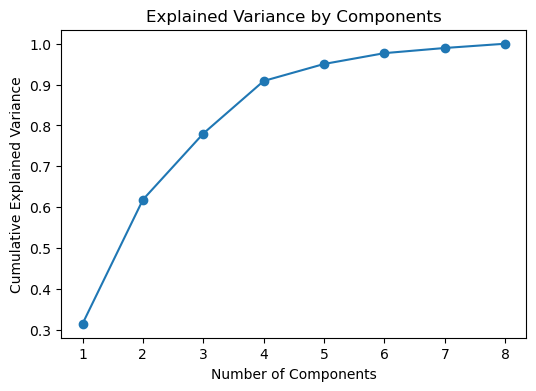

In [115]:
# Plot cumulative variance explained by total number of components, using the .cumsum() method
# We can use the "Elbow" technique to try to optimize for the subset of components we want to retain for k-means clustering work
# A rule-of-thumb is to select sufficient principal components to reach ~ 80% cumulative sum of explained variance

plt.figure(figsize = (6, 4))
plt.plot(range(1,9), pca3.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-') 
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('plot_low_res.jpg', dpi=100)
plt.show()

#### A bit of a judgement call, as three (3) components would be a sensible choice, based on the "Elbow" technique and aiming for ~ 80% or higher cumulative variance explained.  Four components would increase that metric to ~91%, but would not help us with dimensionality reduction, since complexity and computational needs can climb non-linearly as more features are added.  The 78% of variance explained via 3 PCs is close enough to the 80% goal, thus three (3) components are chosen for further analysis.

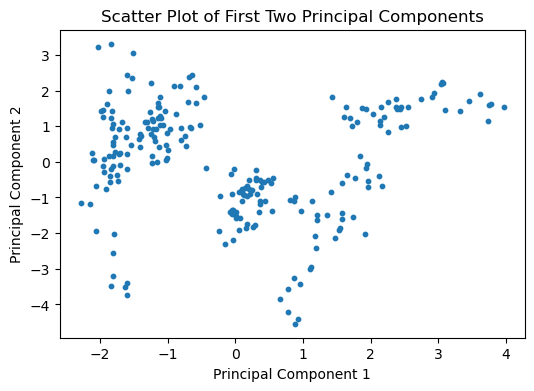

In [118]:
# Scatterplotting in 2D the first two (2) principal components against each other to look for any clear clusters
# Because pca3.fit() here outputs a fitted object but does not directly output a transformed dataset, we need to transform the object
# The fit_transform() function will fit the PCA model to the data and transform it to the new principal component space (coordinates system)
# We create a PCA object with n_components=2, to select the first two principal components

pca3_2 = PCA(n_components=2)
pca3_results_2 = pca3_2.fit_transform(df3_std)

plt.figure(figsize=(6, 4))
plt.scatter(pca3_results_2[:,0], pca3_results_2[:,1], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(False)
plt.savefig('plot_low_res.jpg', dpi=100)
plt.show()

#### The visual separability of the data (above) suggests that k-means clustering should work for this standardized Australia dataset, as it did for Norway, the US, Germany, Japan, South Korea and Switzerland.

### 05. k-means clustering

In [121]:
# From PCA we decided to keep only 3 components (of 8) for the originally-sourced raw data (standardized) in the "df3_std" array
# We need to instantiate an object again by applying the PCA() function to 3 components

pca3 = PCA(n_components = 3)

In [123]:
# Fit the pca3 model to the standardized data in the "df3_std" array, with the selected three (3) components
pca3.fit(df3_std)

PCA(n_components=3)

In [125]:
# Obtain the component loadings matrix
# The matrix shows how much each original variable contributes to each of the three (3) principal components (PCs)
# The loadings help us later interpret what each PC represents conceptually in terms of behaviors (i.e. "risk-on vs defensive", etc.)

loadings_df3 = pd.DataFrame(pca3.components_.T,
                           columns=[f'PC{i+1}' for i in range(pca3.n_components_)],
                           index=df3.columns)

In [127]:
loadings_df3.shape

(8, 3)

#### Loadings of the principal components

In [130]:
# Check the loadings of the principal components
loadings_df3

,PC1,PC2,PC3
int_rate_10y,-0.305291,0.410110,0.377364
stock_index,0.586297,0.158728,-0.043203
unemp_rate,-0.237022,-0.400969,-0.523045
vix_avg,-0.118113,-0.251655,0.674591
usd_aud,0.499362,-0.224920,0.293409
brent_avg,-0.171663,0.488154,-0.033721
aud_jpy,0.129627,0.536453,-0.186253
gold_oz_usd,0.444172,0.076444,-0.071867


#### The loadings show the key driver components contributing to the PCs (principal components). Australia's PC drivers and relative loadings differ in some instances from those of other countries.  PC1 has only three (3) primary drivers (Australian primary stock market index, USDAUD e.g. Australian Dollar amount per 1 US Dollar and gold price per ounce (USD)), while PC2 is broad-based with four (4) primary drivers. These are AUDJPY (Japanese Yen amount per 1 Australian Dollar), Brent crude oil price (USD), the 10-year interest rate and the unemployment rate.  The unemployment rate also makes an appearance as a primary driver in PC3, along with the VIX (US equities market fear gauge, with global reach).  As mentioned earlier, inflation data on a monthly cycle was not available in the source dataset for Australia.      

In [133]:
# Use the transform() function to create PCA scores which will be incorporated in the k-means algorithm
# That will permit clustering segmentation based on principal components scores rather than original features

pca3.transform(df3_std)

array([[-1.22992408e+00, -2.35169341e-02,  2.85219877e-02],
       [-1.15042481e+00,  6.04042924e-03,  1.17397458e-01],
       [-1.02443594e+00,  6.11789921e-02,  2.86961299e-01],
       [-9.87989750e-01,  3.36553062e-01,  2.41492869e-01],
       [-1.12312827e+00,  4.10735568e-01,  5.19898657e-01],
       [-1.23708810e+00,  1.70665433e-01,  8.09723405e-01],
       [-1.18455512e+00,  5.76870280e-01,  7.09263975e-01],
       [-1.19604543e+00,  6.99941673e-01,  4.40732802e-01],
       [-1.03087896e+00,  4.79490476e-01,  3.61884916e-01],
       [-7.97651417e-01,  6.12706551e-01,  4.36757629e-01],
       [-7.46642258e-01,  7.30044063e-01,  2.66368246e-01],
       [-8.05205655e-01,  9.37612815e-01,  1.73475551e-01],
       [-6.55459139e-01,  9.55082147e-01,  2.18272303e-01],
       [-5.18184171e-01,  1.02414425e+00,  1.34444473e-01],
       [-6.64753628e-01,  9.84405181e-01,  5.43487338e-01],
       [-5.78348609e-01,  1.65808441e+00,  2.39894339e-01],
       [-4.56780163e-01,  1.81738558e+00

#### Save the PCA scores

In [135]:
# Save the principal components scores array output for use in the k-means algorithm
scores_pca3 = pca3.transform(df3_std)

#### The next step is to determine the number of clusters for the k-means algorithm, starting with a "plug" number of 10, then having the algorithm test varying cluster numbers and determining the WCSS ("Within Cluster Sum of Squares") of each, which when plotted against cluster number allows us to visually use the "Elbow" technique (again) to optimize for the number of clusters to adopt. The "Elbow" technique is equally relevant to PCA-based principal component selection as to k-means-based cluster number selection.  WCSS quantifies the compactness of a cluster, calculated by summing the squared distances between each data point and the centroid of its respective cluster. The smaller the WCSS, the better for a clustering goal.

#### k-means clustering with PCA

In [137]:
# Fit k-means algorithm with the transformed data from the PCA
# The "random_state= [any integer value]" argument ensures reproducibility of results
# This "seeding" of the random number generator is needed because k-means is a non-deterministic algorithm

wcss3 = []

for i in range(1,11):
    kmeans_pca3 = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)  # Create a KMeans instance with i clusters: kmeans_pca
    kmeans_pca3.fit(scores_pca3)  # Fit the model to the PCA scores
    wcss3.append(kmeans_pca3.inertia_)  # Append the inertia value (e.g., the WCSS calculated value) to the list of inertias

In [139]:
wcss3[0:3]

[1441.705748266661, 1028.4939478248873, 728.1446059261011]

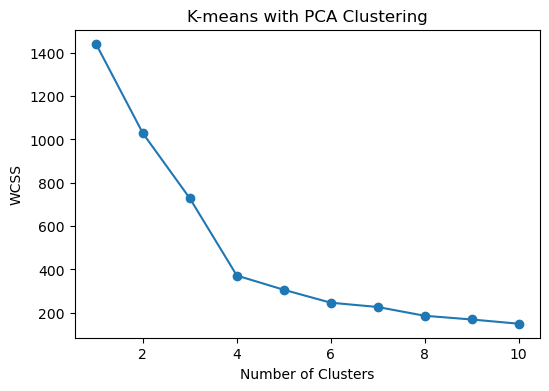

In [141]:
# Plot the WCSS against the number of components in a line plot

plt.figure(figsize = (6, 4))
plt.plot(range(1,11), wcss3, marker = 'o', linestyle = '-')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('plot_low_res.jpg', dpi=100)
plt.show()

#### Using the "Elbow" technique, the magic number is four (4) clusters here, the same as for several other countries. Beyond four (4) clusters is where the rate of deceleration (translation: improvement) of WCSS minimization ("compression") tails off sharply.

In [143]:
# We will run the k-means clustering algorithm on 4 clusters, based on the WCSS line plot against number of clusters
# Apply same initializer and random state integer used prior (above)

kmeans_pca3 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 2)

In [145]:
# Fit the scores_pca3 with the kmeans_pca3 model

kmeans_pca3.fit(scores_pca3)

KMeans(n_clusters=4, random_state=2)

### Results: k-means clustering with PCA

#### Create a new dataframe that takes the original source dataframe, adds the components' scores from the scores_pca3 array (to be labeled Component 1, 2 and 3), and the cluster labels. Also add a 'Segment' new column to name each of the four clusters (initially as "first", "second", "third" and "fourth", which can be swapped later for more descriptive names). Finally, add columns for 'timestamp' and the categorical variable 'shock_name', in order to compare behavioral patterns in the data with exogenous shock periods.

In [147]:
df3_pca_kmeans_time_shk = pd.concat([timestamp_shock, df3, pd.DataFrame(scores_pca3)], axis = 1) # Concatenates 3 longitudinally-equal datasets
df3_pca_kmeans_time_shk.columns.values[-3: ] = ['component 1', 'component 2', 'component 3'] # Renames the principal component columns
df3_pca_kmeans_time_shk['segment k-means pca'] = kmeans_pca3.labels_   # Adds a column with the clustering labels

In [149]:
df3_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd,component 1,component 2,component 3,segment k-means pca
0,2006-01-01,No Shock,5.20,88.11,5.16,12.04,1.34,63.31,86.61,549.86,-1.229924,-0.023517,0.028522,0
1,2006-02-01,No Shock,5.27,88.79,5.10,12.47,1.35,60.81,87.49,555.00,-1.150425,0.006040,0.117397,0
2,2006-03-01,No Shock,5.34,90.61,4.87,11.69,1.37,62.75,85.33,557.09,-1.024436,0.061179,0.286961,0


In [151]:
df3_pca_kmeans_time_shk.tail(3)

,timestamp,shock_name,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd,component 1,component 2,component 3,segment k-means pca
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,4.48,151.71,4.11,16.76,1.61,78.19,97.48,2709.69,3.782672,1.62313,0.615518,3
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,4.42,153.03,4.05,16.97,1.59,75.19,95.68,2894.73,3.962622,1.52483,0.634491,3
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,4.42,144.68,4.05,21.84,1.59,71.74,93.84,2983.30,3.736423,1.14662,1.074149,3


In [153]:
# Add a 'segment' column to give a preliminary name to each of the 4 clusters
df3_pca_kmeans_time_shk['segment'] = df3_pca_kmeans_time_shk['segment k-means pca'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [155]:
df3_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,5.20,88.11,5.16,12.04,1.34,63.31,86.61,549.86,-1.229924,-0.023517,0.028522,0,first
1,2006-02-01,No Shock,5.27,88.79,5.10,12.47,1.35,60.81,87.49,555.00,-1.150425,0.006040,0.117397,0,first
2,2006-03-01,No Shock,5.34,90.61,4.87,11.69,1.37,62.75,85.33,557.09,-1.024436,0.061179,0.286961,0,first


In [157]:
df3_pca_kmeans_time_shk.tail(3)

,timestamp,shock_name,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd,component 1,component 2,component 3,segment k-means pca,segment
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,4.48,151.71,4.11,16.76,1.61,78.19,97.48,2709.69,3.782672,1.62313,0.615518,3,fourth
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,4.42,153.03,4.05,16.97,1.59,75.19,95.68,2894.73,3.962622,1.52483,0.634491,3,fourth
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,4.42,144.68,4.05,21.84,1.59,71.74,93.84,2983.30,3.736423,1.14662,1.074149,3,fourth


In [159]:
df3_pca_kmeans_time_shk['segment'].value_counts()

segment
first     99
second    82
fourth    40
third     10
Name: count, dtype: int64

In [161]:
df3_pca_kmeans_time_shk.columns

Index(['timestamp', 'shock_name', 'int_rate_10y', 'stock_index', 'unemp_rate',
       'vix_avg', 'usd_aud', 'brent_avg', 'aud_jpy', 'gold_oz_usd',
       'component 1', 'component 2', 'component 3', 'segment k-means pca',
       'segment'],
      dtype='object')

In [163]:
df3_pca_kmeans_time_shk['shock_name'].value_counts()

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

In [165]:
df3_pca_kmeans_time_shk.dtypes

timestamp              datetime64[ns]
shock_name                     object
int_rate_10y                  float64
stock_index                   float64
unemp_rate                    float64
vix_avg                       float64
usd_aud                       float64
brent_avg                     float64
aud_jpy                       float64
gold_oz_usd                   float64
component 1                   float64
component 2                   float64
component 3                   float64
segment k-means pca             int32
segment                        object
dtype: object

### 06. Visualizations

##### Note: in section 04 above we imported PIL and the Image class from IPython.display to allow us to save and show visualizations in smaller file size formats.

In [167]:
# Check the prior-specified variable path
path

'C:\\Users\\dirk8\\CareerFoundry Projects\\05-2025 Exogenous Shocks Analysis'

In [169]:
# Plot data by PCA components

x_axis = df3_pca_kmeans_time_shk['component 1']
y_axis = df3_pca_kmeans_time_shk['component 2']
plt.figure(figsize = (6, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df3_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm', 'c'])
plt.title('Clusters by PCA Components')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc1_pc2_2d.jpg'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

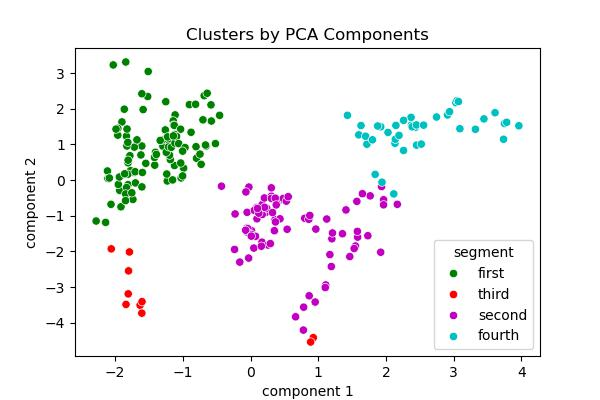

In [171]:
# Display the 2D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc1_pc2_2d.jpg'))

#### Decent cluster separation in 2D, with one "outlier" red data value deep in magenta territory, unless it's separated on a different axis in a 3D setting (e.g. different elevation level). Also one cyan data value overlaps a magenta one, at least on a 2D plane.

In [174]:
# Plot more data by PCA components

x_axis = df3_pca_kmeans_time_shk['component 1']
y_axis = df3_pca_kmeans_time_shk['component 3']
plt.figure(figsize = (6, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df3_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm', 'c'])
plt.title('Clusters by PCA Components')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc1_pc3_2d.jpg'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

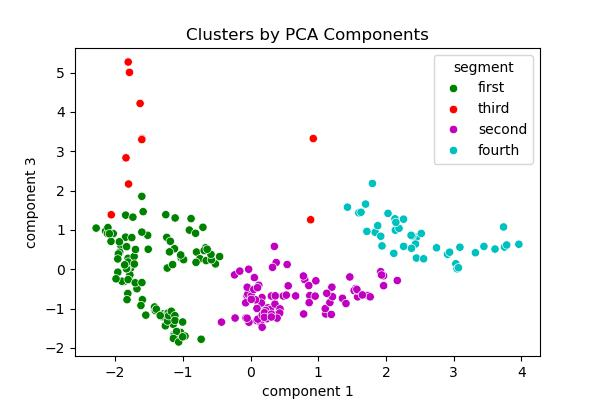

In [176]:
# Display the 2D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc1_pc3_2d.jpg'))

#### Surprising degree of separation for PC1 vs PC3 as compared with other countries, but again this is a 2D view.

In [179]:
# Plot more data by PCA components

x_axis = df3_pca_kmeans_time_shk['component 2']
y_axis = df3_pca_kmeans_time_shk['component 3']
plt.figure(figsize = (6, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df3_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm', 'c'])
plt.title('Clusters by PCA Components')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc2_pc3_2d.jpg'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

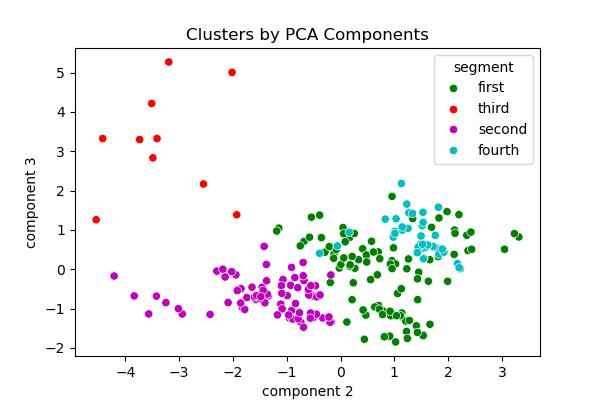

In [181]:
# Display the 2D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc2_pc3_2d.jpg'))

#### As for the other countries, little cluster separation on a 2D plot of PC2 vs PC3.

In [183]:
# Create a 3D scatterplot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

x_axis = df3_pca_kmeans_time_shk['component 1']
y_axis = df3_pca_kmeans_time_shk['component 2']
z_axis = df3_pca_kmeans_time_shk['component 3']
clusters = df3_pca_kmeans_time_shk['segment k-means pca']

# Create custom color map
custom_map3 = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['green', 'red', 'purple', 'cyan'])

# Create figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with custom colormap
scatter = ax.scatter(x_axis, y_axis, z_axis, c=clusters, cmap=custom_map3)

plt.colorbar(scatter, label='Clusters')  # Creates a colorbar to explain the color mapping

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.title('Clusters by PCA Components in 3D')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc1_pc2_pc3_3d.jpg'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

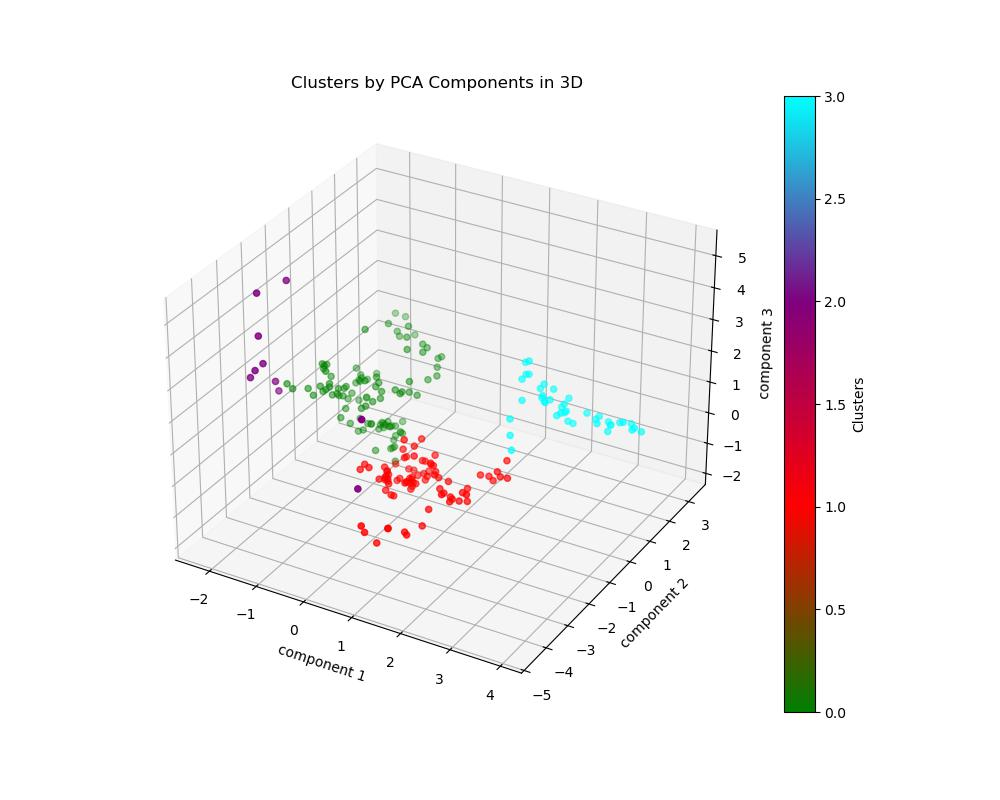

In [185]:
# Display the 3D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_pc1_pc2_pc3_3d.jpg'))

#### Decent cluster separation here when visualizing in 3D, where many data points seem to reside higher on the z-axis (vertical) plane, to a greater extent than for the other countries modeled so far except Switzerland.  A rotatable 3D plot that allows inspection from different angles would further help assess separation of the four (4) clusters visually.

In [188]:
# Plot a timeline of clusters for visibility into macro regimes

import matplotlib.dates as mdates  # Import this function to use in adjusting the x-axis date regime

# Define a color map for each unique shock
shock_colors = {
    'GFC': '#D62728',                  # red
    'CPC': '#FF7F0E',                 # orange
    'Cov-19': '#1F77B4',             # blue
    'Rus_Ukr_War': '#2CA02C',        # green
    'BOJ Pivot': '#9467BD',          # purple
    'Cov-19 & Rus_Ukr_War': '#8C564B',      # brown
    'Rus_Ukr_War & BOJ Pivot': '#E377C2'    # pink
}

x_series = df3_pca_kmeans_time_shk['timestamp']
y_series = df3_pca_kmeans_time_shk['segment k-means pca']

plt.figure(figsize = (14, 6))

ax = plt.gca()  # Get the current axes

# Set the date format to Year-Month (e.g., 2020-03)
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Control the monthly tick spacing to show monthly ticks
# Adjust the interval as needed
# For example, to show ticks every 3 months: mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate the x-axis labels vertically for legibility
plt.xticks(rotation=90)

plt.plot(x_series, y_series, marker = 'o', linestyle = '-')

# Add color bands for each shock (skip 'No Shock')
for shock in df3_pca_kmeans_time_shk['shock_name'].unique():
    if shock != 'No Shock':
        mask = df3_pca_kmeans_time_shk['shock_name'] == shock
        start_date = df3_pca_kmeans_time_shk.loc[mask, 'timestamp'].min()
        end_date = df3_pca_kmeans_time_shk.loc[mask, 'timestamp'].max()

        # Handle hybrid shock labels by mapping to a single color
        for keyword in shock_colors:
            if keyword in shock:
                ax.axvspan(start_date, end_date,
                           color=shock_colors[keyword], alpha=0.2,
                           label=keyword if keyword not in ax.get_legend_handles_labels()[1] else "")
                break

plt.title('Timeline of Clusters with Shock Overlays')
plt.xlabel('Date')
plt.ylabel('Cluster Number')
ax.grid(axis='x', which='major') # This will show vertical gridlines from the x-axis ticks

# Show unique legend entries only
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.tight_layout() # Automatically adjusts subplot parameters for a tight layout
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_timeline.jpg'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

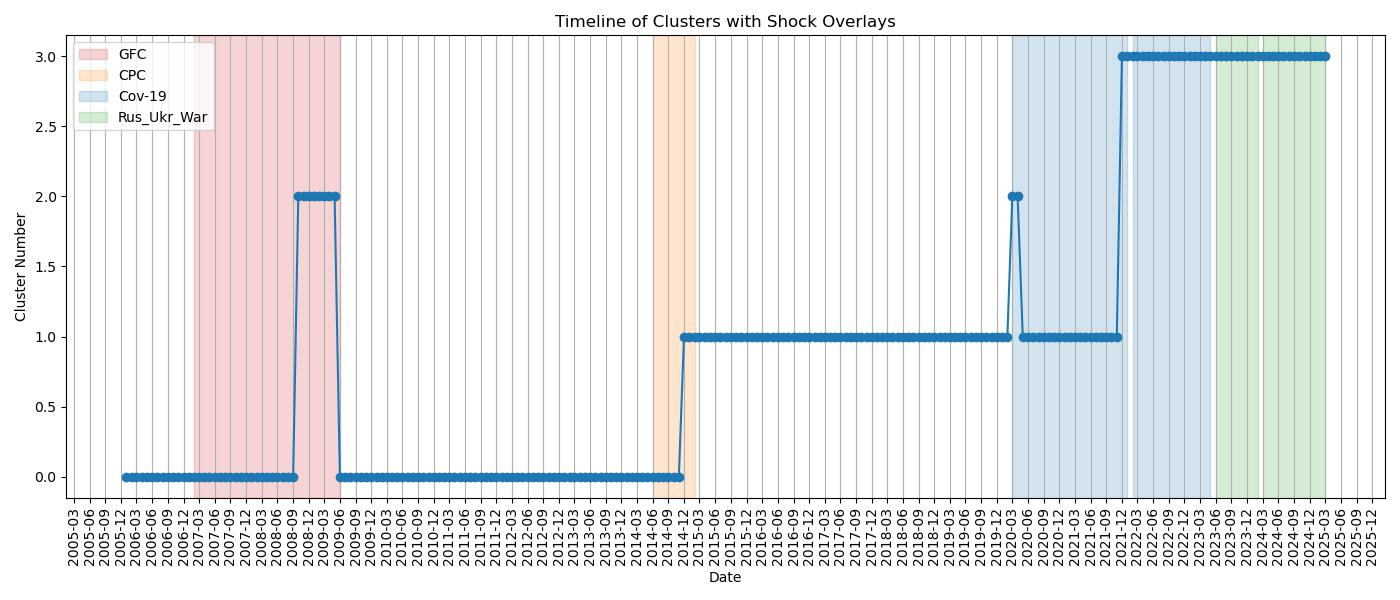

In [190]:
# Display the line plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'australia_clust_timeline.jpg'))

#### The six (6) cluster shifts are less than those for all other countries except Norway, which had remarkably few (2) cluster shifts over a 20-year period. From a cluster shift (e.g. economic regime change) angle, Australia's economy is quite stable, comparatively speaking.  Australia and Norway are large exporters of natural resources. Both countries are helped by a secular commodities-based price inflation trend.

#### Calculate summary stats per cluster for original variables

In [195]:
summary3 = df3_pca_kmeans_time_shk.groupby('segment').agg({
    'int_rate_10y': ['mean', 'median', 'std'],
    'stock_index': ['mean', 'median', 'std'],
    'aud_jpy': ['mean', 'median', 'std'],
    'vix_avg': ['mean', 'median', 'std'],
    'usd_aud': ['mean', 'median', 'std'],
    'unemp_rate': ['mean', 'median', 'std'],
    'brent_avg': ['mean', 'median', 'std'],
    'gold_oz_usd': ['mean', 'median', 'std']
})

In [197]:
summary3.shape

(4, 24)

In [199]:
summary3

int_rate_10y                  stock_index                      \
                mean median       std        mean   median        std   
segment                                                                 
first       4.867677  5.320  1.059153   91.401818   90.480  11.491248   
fourth      3.778000  3.950  0.716459  135.678500  132.975   8.630221   
second      2.084878  2.425  0.709900  109.830610  107.640  11.753110   
third       3.829000  4.290  1.606393   73.340000   68.275  13.569640   

           aud_jpy                      vix_avg  ...   usd_aud unemp_rate  \
              mean  median       std       mean  ...       std       mean   
segment                                          ...                        
first    88.756364  87.490  7.734794  18.692222  ...  0.120736   5.128586   
fourth   94.463750  94.905  5.325149  19.313000  ...  0.062675   3.841250   
second   82.324024  82.375  5.969791  16.964756  ...  0.065833   5.658049   
third    66.161000  66.005  4.633819  48.054000  ...  0.088794   5.204000   

                          brent_avg                     gold_oz_usd            \
        median       std       mean  median        std         mean    median   
segment                                                                         
first    5.180  0.589618  93.305152  97.850  20.642866  1164.696263  1222.490   
fourth   3.895  0.238039  85.864000  83.295  11.557798  2098.745000  1949.425   
second   5.605  0.594270  58.085488  58.100  12.071982  1401.474634  1284.805   
third    5.245  0.648335  46.666000  44.875  12.592542  1020.347000   907.235   

                     
                std  
segment              
first    376.309890  
fourth   356.333469  
second   253.672713  
third    331.238394  

[4 rows x 24 columns]

In [201]:
# Display middle column fully
summary3.loc[:, ['vix_avg', 'usd_aud']]

vix_avg                      usd_aud                 
              mean  median        std      mean median       std
segment                                                         
first    18.692222  17.320   5.953733  1.102323  1.090  0.120736
fourth   19.313000  18.355   5.041853  1.495000  1.500  0.062675
second   16.964756  15.845   5.030470  1.355122  1.350  0.065833
third    48.054000  45.185  10.158312  1.488000  1.495  0.088794

## Data wrangling

#### Create a subset dataframe to facilitate time series line plots of each standardized PC and its influential variable contributors.
#### The line plots are intended to help with interpretation of PC regimes and response to exogenous shocks.
##### Rescale raw data variables into a dataframe for manipulation, rather than the default array object type created by StandardScaler()
##### scaler.set_output(transform='pandas') will change the scaled output array object into a dataframe, once scaler.fit_transform() is run

In [203]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

StandardScaler()

In [205]:
df3_std_datafr = scaler.fit_transform(df3)

In [207]:
df3_std_datafr.head(3)

,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd
0,1.013797,-0.817667,0.076373,-0.886033,0.342632,-0.602277,0.014114,-1.809861
1,1.059469,-0.784410,0.003772,-0.834669,0.396805,-0.708420,0.112034,-1.798973
2,1.105141,-0.695398,-0.274534,-0.927840,0.505153,-0.626053,-0.128316,-1.794546


##### Wrangle the data from two dataframes into a subset dataframe that will be used for the line plots

In [210]:
df3_pca_kmeans_time_shk.columns

Index(['timestamp', 'shock_name', 'int_rate_10y', 'stock_index', 'unemp_rate',
       'vix_avg', 'usd_aud', 'brent_avg', 'aud_jpy', 'gold_oz_usd',
       'component 1', 'component 2', 'component 3', 'segment k-means pca',
       'segment'],
      dtype='object')

In [212]:
df3_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,5.20,88.11,5.16,12.04,1.34,63.31,86.61,549.86,-1.229924,-0.023517,0.028522,0,first
1,2006-02-01,No Shock,5.27,88.79,5.10,12.47,1.35,60.81,87.49,555.00,-1.150425,0.006040,0.117397,0,first
2,2006-03-01,No Shock,5.34,90.61,4.87,11.69,1.37,62.75,85.33,557.09,-1.024436,0.061179,0.286961,0,first


In [214]:
australia_pc_df3_std = df3_pca_kmeans_time_shk[['timestamp', 'shock_name', 'component 1', 'component 2', 'component 3', \
                                              'segment k-means pca', 'segment']]

In [216]:
australia_pc_df3_std.head(3)

,timestamp,shock_name,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,-1.229924,-0.023517,0.028522,0,first
1,2006-02-01,No Shock,-1.150425,0.006040,0.117397,0,first
2,2006-03-01,No Shock,-1.024436,0.061179,0.286961,0,first


##### The 3 PC variables need to be standardized to enable like-with-like scale comparisons with their standardized key component variables in the time series line plots further below.

In [218]:
columns_to_scale = ['component 1', 'component 2', 'component 3']

In [220]:
# Instantiates the StandardScaler class and assigns the newly-created instance to the variable 'scaler'
scaler = StandardScaler()  

##### Note: it is necessary to use the .loc[] indexing (below) to avoid a SettingWithCopyWarning message regarding attempting to modify a dataframe that is potentially a "view' of another dataframe, rather than an independent "copy". 

In [223]:
# The expression to the right of the "=" sign rescales the data in the 3 columns named in the variable (a list) 'columns_to_scale'
# The entire script overwrites the 3 columns with the rescaled data

australia_pc_df3_std.loc[:, (columns_to_scale)] = scaler.fit_transform(australia_pc_df3_std[columns_to_scale])

In [225]:
# Column names for the standardized PCs need to be renamed for accurate labeling
australia_pc_df3_std = australia_pc_df3_std.rename(columns={'component 1': 'component_1_std', 'component 2': 'component_2_std', \
                                             'component 3': 'component_3_std'})

In [227]:
# Check a dataframe containing scaled data columns to be added
df3_std_datafr.columns

Index(['int_rate_10y', 'stock_index', 'unemp_rate', 'vix_avg', 'usd_aud',
       'brent_avg', 'aud_jpy', 'gold_oz_usd'],
      dtype='object')

In [229]:
df3_std_datafr.head(3)

,int_rate_10y,stock_index,unemp_rate,vix_avg,usd_aud,brent_avg,aud_jpy,gold_oz_usd
0,1.013797,-0.817667,0.076373,-0.886033,0.342632,-0.602277,0.014114,-1.809861
1,1.059469,-0.784410,0.003772,-0.834669,0.396805,-0.708420,0.112034,-1.798973
2,1.105141,-0.695398,-0.274534,-0.927840,0.505153,-0.626053,-0.128316,-1.794546


In [231]:
australia_pc_df3_std.head(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment
0,2006-01-01,No Shock,-0.775391,-0.015086,0.025062,0,first
1,2006-02-01,No Shock,-0.725271,0.003875,0.103154,0,first
2,2006-03-01,No Shock,-0.645843,0.039247,0.252146,0,first


##### Combine the dataframes

In [233]:
australia_pc_df3_std.loc[:, ['int_rate_10y', 'stock_index', 'unemp_rate', 'vix_avg', \
       'aud_jpy', 'brent_avg', 'usd_aud', 'gold_oz_usd']] = df3_std_datafr[['int_rate_10y', 'stock_index', \
       'unemp_rate', 'vix_avg', 'aud_jpy', 'brent_avg', 'usd_aud', 'gold_oz_usd']]

In [235]:
australia_pc_df3_std.head(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y,stock_index,unemp_rate,vix_avg,aud_jpy,brent_avg,usd_aud,gold_oz_usd
0,2006-01-01,No Shock,-0.775391,-0.015086,0.025062,0,first,1.013797,-0.817667,0.076373,-0.886033,0.014114,-0.602277,0.342632,-1.809861
1,2006-02-01,No Shock,-0.725271,0.003875,0.103154,0,first,1.059469,-0.784410,0.003772,-0.834669,0.112034,-0.708420,0.396805,-1.798973
2,2006-03-01,No Shock,-0.645843,0.039247,0.252146,0,first,1.105141,-0.695398,-0.274534,-0.927840,-0.128316,-0.626053,0.505153,-1.794546


In [237]:
# Column names for the standardized original variables need to be renamed for accurate labeling

australia_pc_df3_std = australia_pc_df3_std.rename(columns={'int_rate_10y': 'int_rate_10y_std', 'stock_index': 'stock_index_std', \
                                             'unemp_rate': 'unemp_rate_std', 'vix_avg': 'vix_avg_std', \
                                             'aud_jpy': 'aud_jpy_std', 'brent_avg': 'brent_avg_std', 'usd_aud': 'usd_aud_std', \
                                             'gold_oz_usd': 'gold_oz_usd_std'})

In [239]:
australia_pc_df3_std.shape

(231, 15)

In [241]:
australia_pc_df3_std.head(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y_std,stock_index_std,unemp_rate_std,vix_avg_std,aud_jpy_std,brent_avg_std,usd_aud_std,gold_oz_usd_std
0,2006-01-01,No Shock,-0.775391,-0.015086,0.025062,0,first,1.013797,-0.817667,0.076373,-0.886033,0.014114,-0.602277,0.342632,-1.809861
1,2006-02-01,No Shock,-0.725271,0.003875,0.103154,0,first,1.059469,-0.784410,0.003772,-0.834669,0.112034,-0.708420,0.396805,-1.798973
2,2006-03-01,No Shock,-0.645843,0.039247,0.252146,0,first,1.105141,-0.695398,-0.274534,-0.927840,-0.128316,-0.626053,0.505153,-1.794546


In [243]:
australia_pc_df3_std.tail(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y_std,stock_index_std,unemp_rate_std,vix_avg_std,aud_jpy_std,brent_avg_std,usd_aud_std,gold_oz_usd_std
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,2.384739,1.041259,0.540841,3,fourth,0.544026,2.292838,-1.194154,-0.322227,1.223655,0.029490,1.805324,2.765385
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,2.498186,0.978198,0.557513,3,fourth,0.504879,2.357396,-1.266756,-0.297142,1.023363,-0.097882,1.696976,3.157362
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,2.355582,0.735571,0.943830,3,fourth,0.504879,1.949020,-1.266756,0.284582,0.818620,-0.244360,1.696976,3.344983


##### The subset dataframe "australia_pc_df3_std" created above will be used as the dataframe in the next line plots

In [246]:
# Check the columns
australia_pc_df3_std.columns

Index(['timestamp', 'shock_name', 'component_1_std', 'component_2_std',
       'component_3_std', 'segment k-means pca', 'segment', 'int_rate_10y_std',
       'stock_index_std', 'unemp_rate_std', 'vix_avg_std', 'aud_jpy_std',
       'brent_avg_std', 'usd_aud_std', 'gold_oz_usd_std'],
      dtype='object')

## Define a custom function

In [256]:
import matplotlib.dates as mdates

# Define color map for known shocks
shock_colors = {
    'GFC': '#D62728',
    'CPC': '#FF7F0E',
    'Cov-19': '#1F77B4',
    'Rus_Ukr_War': '#2CA02C',
    'BOJ Pivot': '#9467BD',
    'Cov-19 & Rus_Ukr_War': '#8C564B',
    'Rus_Ukr_War & BOJ Pivot': '#E377C2'
}

# Optional: Define known cluster pivot points (YYYY-MM format strings)
cluster_pivots = {
    '2008-10': 'Cluster 0→2 Pivot',
    '2009-06': 'Cluster 2→0 Pivot',
    '2014-12': 'Cluster 0→1 Pivot',
    '2020-03': 'Cluster 1→2 Pivot',
    '2020-05': 'Cluster 2→1 Pivot',
    '2021-12': 'Cluster 1→3 Pivot'
}

def plot_pc_with_components_and_shocks(x, pc_series, comp_dict, df, pc_label='PC1', title=None,
                                       show_cluster_pivots=True, cluster_pivots=cluster_pivots):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=90)

    # Plot the PC and components
    plt.plot(x, pc_series, label=pc_label, marker='o')
    for comp_name, comp_series in comp_dict.items():
        plt.plot(x, comp_series, label=comp_name, marker='o')

    # Shock overlays as colored bands
    for shock in df['shock_name'].unique():
        if shock != 'No Shock':
            mask = df['shock_name'] == shock
            start_date = df.loc[mask, 'timestamp'].min()
            end_date = df.loc[mask, 'timestamp'].max()
            for keyword in shock_colors:
                if keyword in shock:
                    ax.axvspan(start_date, end_date, color=shock_colors[keyword], alpha=0.2,
                               label=keyword if keyword not in ax.get_legend_handles_labels()[1] else "")
                    break

    # Cluster pivot lines and annotations
    if show_cluster_pivots:
        for date_str, label in cluster_pivots.items():
            date = pd.to_datetime(date_str)
            ax.axvline(date, color='black', linestyle='--', linewidth=1.3)
            plt.text(date, ax.get_ylim()[1]*0.92, label, rotation=90, fontsize=9,
                     color='black', va='top', ha='center',
                     bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    # Title, labels, legend
    plt.title(title or f'Australia: Standardized {pc_label} and High-Loading Components with Shocks')
    plt.xlabel('Date')
    plt.ylabel('Standardized Value')
    ax.grid(axis='x', which='major')

    # Deduplicate legend entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper left')

    plt.tight_layout()
    plt.show()

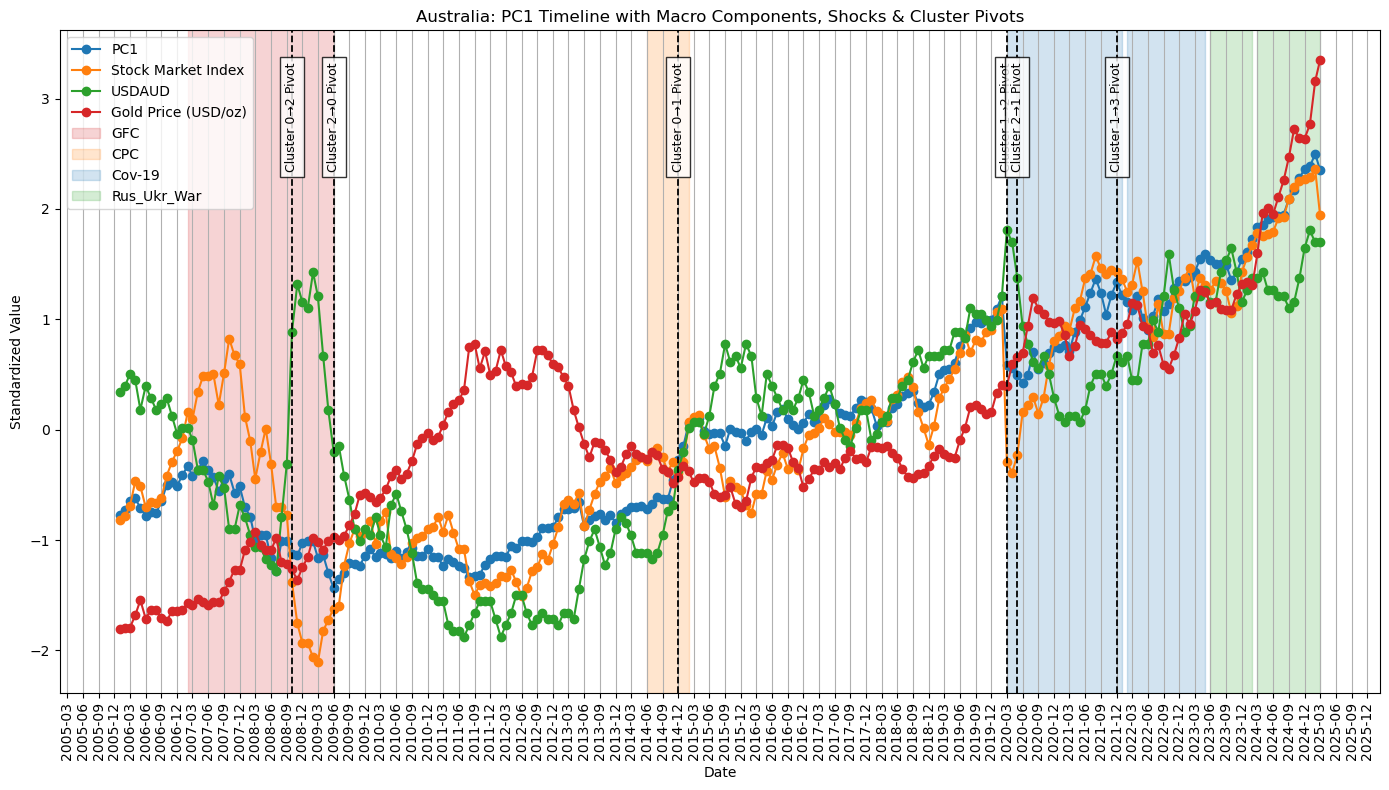

In [258]:
# Call the custom function to output the first line plot

plot_pc_with_components_and_shocks(
    x=australia_pc_df3_std['timestamp'],
    pc_series=australia_pc_df3_std['component_1_std'],
    comp_dict={
        'Stock Market Index': australia_pc_df3_std['stock_index_std'],
        'USDAUD': australia_pc_df3_std['usd_aud_std'],
        'Gold Price (USD/oz)': australia_pc_df3_std['gold_oz_usd_std']
    },
    df=australia_pc_df3_std,
    pc_label='PC1',
    title='Australia: PC1 Timeline with Macro Components, Shocks & Cluster Pivots'
)

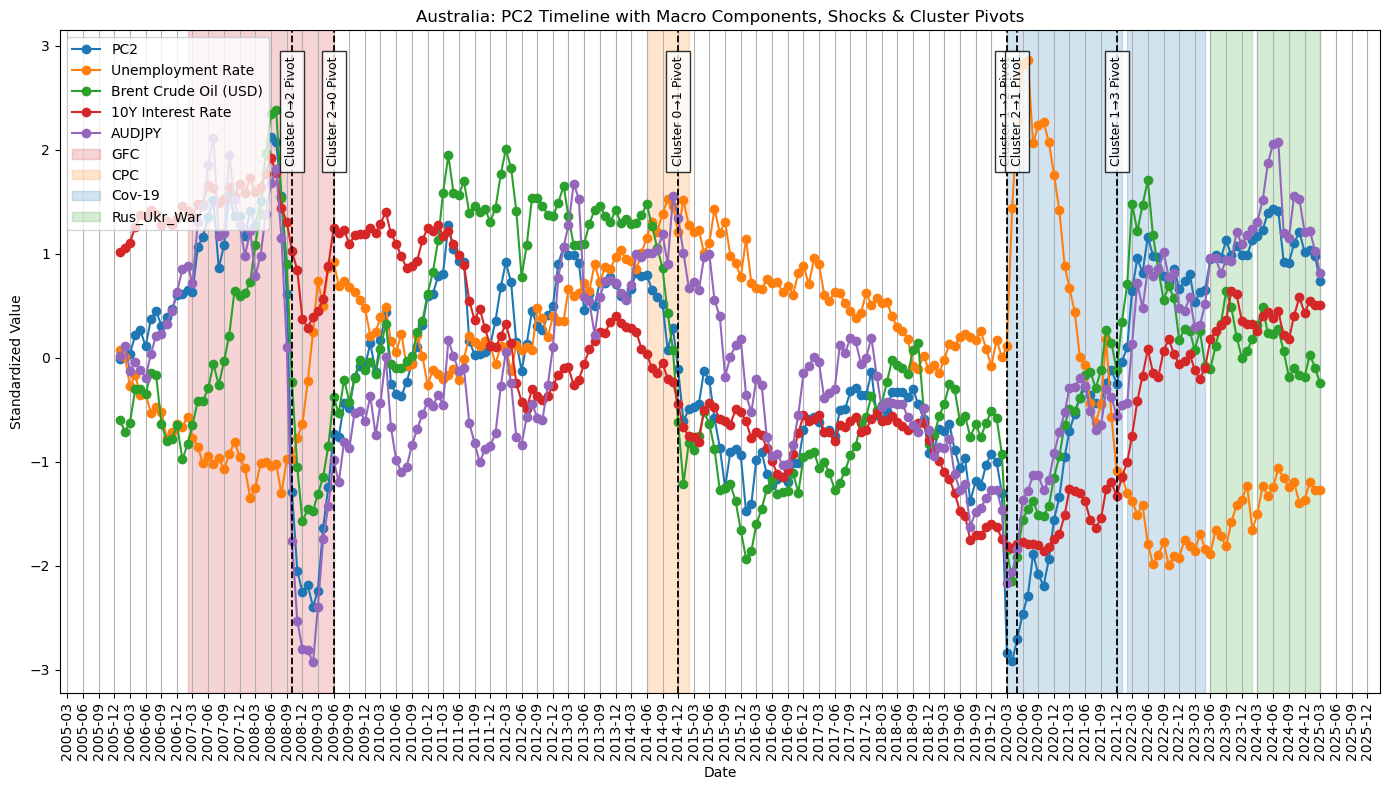

In [260]:
# Call the custom function to output the second line plot

plot_pc_with_components_and_shocks(
    x=australia_pc_df3_std['timestamp'],
    pc_series=australia_pc_df3_std['component_2_std'],
    comp_dict={
        'Unemployment Rate': australia_pc_df3_std['unemp_rate_std'],
        'Brent Crude Oil (USD)': australia_pc_df3_std['brent_avg_std'],
        '10Y Interest Rate': australia_pc_df3_std['int_rate_10y_std'],
        'AUDJPY': australia_pc_df3_std['aud_jpy_std']
    },
    df=australia_pc_df3_std,
    pc_label='PC2',
    title='Australia: PC2 Timeline with Macro Components, Shocks & Cluster Pivots'
)

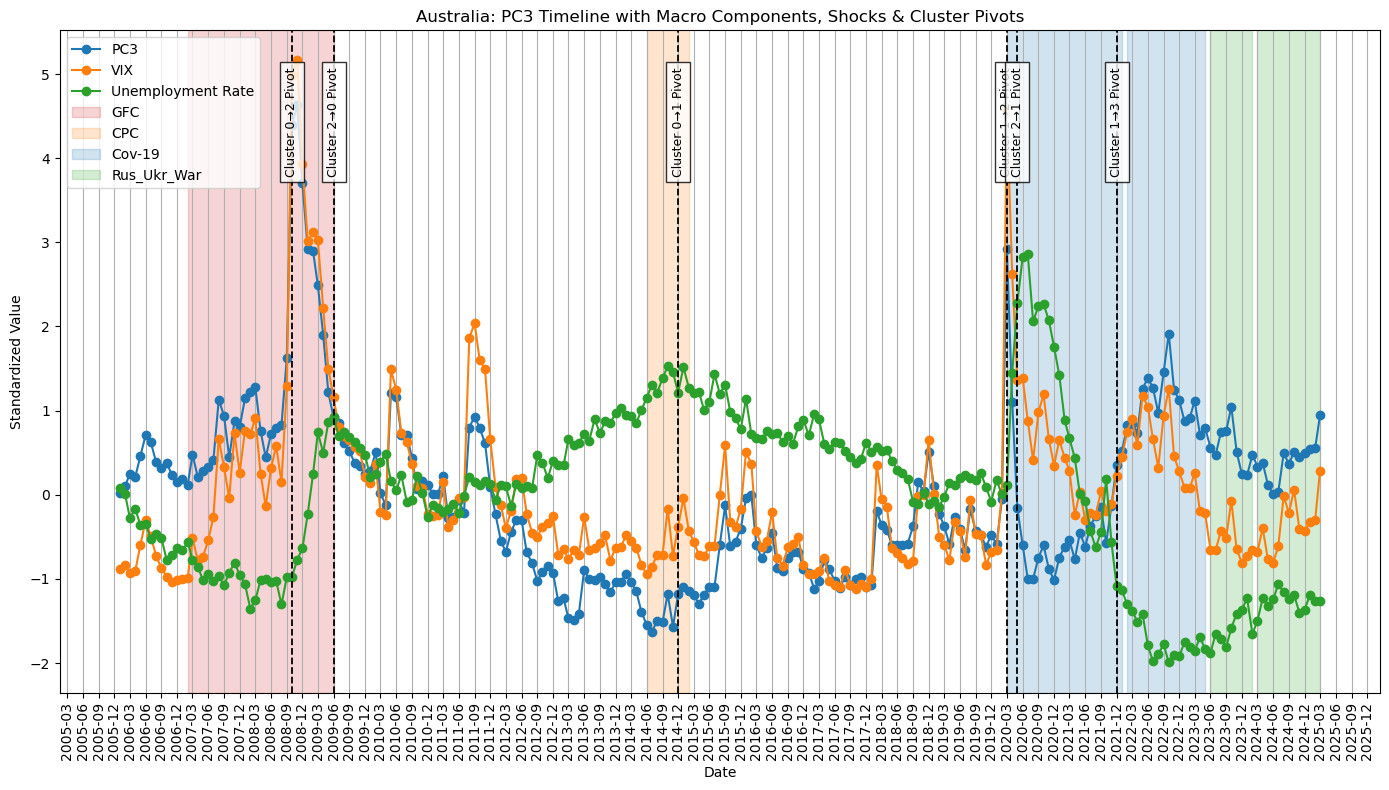

In [262]:
# Call the custom function to output the third line plot

plot_pc_with_components_and_shocks(
    x=australia_pc_df3_std['timestamp'],
    pc_series=australia_pc_df3_std['component_3_std'],
    comp_dict={
        'VIX': australia_pc_df3_std['vix_avg_std'],
        'Unemployment Rate': australia_pc_df3_std['unemp_rate_std']
    },
    df=australia_pc_df3_std,
    pc_label='PC3',
    title='Australia: PC3 Timeline with Macro Components, Shocks & Cluster Pivots'
)

### 07. Extension: Australia SRS component data derivation

#### Comment:

#### The Shock Resilience Score (“SRS”) is an economic resilience metric co-developed with ChatGPT. It measures how robust a country’s economy is during major or moderate exogenous shocks.

#### Based on project observations, the Global Financial Crisis (GFC) and Covid-19 caused major system-wide disruptions. The Commodity Price Collapse (CPC) had moderate impact, while the Russia–Ukraine War and the BoJ Interest Rate Pivot produced only localized effects (e.g., natural gas to Europe or partial unwind of the global carry trade).

#### Accordingly, the SRS will focus on the GFC, Covid-19, and CPC when evaluating the seven OECD countries profiled: Norway, the United States, Germany, Japan, South Korea, Switzerland, and Australia.

#### SRS derivation enables a comparative ranking of economic resilience — and may yield some surprising results.

In [266]:
# Check some of the data content that will be used in SRS component calculations
australia_pc_df3_std.columns

Index(['timestamp', 'shock_name', 'component_1_std', 'component_2_std',
       'component_3_std', 'segment k-means pca', 'segment', 'int_rate_10y_std',
       'stock_index_std', 'unemp_rate_std', 'vix_avg_std', 'aud_jpy_std',
       'brent_avg_std', 'usd_aud_std', 'gold_oz_usd_std'],
      dtype='object')

##### Export dataframe for Excel-based SRS component calculations 

In [269]:
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
australia_pc_df3_std.to_excel(os.path.join(path, 'Data', 'Prepared Data', 'australia_srs_raw.xlsx'))